In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
data = pd.read_csv("Telco churn.csv")

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
list1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
         'PhoneService', 'MultipleLines', 'InternetService',
         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
         'TechSupport', 'StreamingTV', 'StreamingMovies',
         'Contract', 'PaperlessBilling', 'PaymentMethod',
         'Churn']

In [ ]:
le = LabelEncoder()

In [ ]:
for i in list1:
    data[i] = le.fit_transform(data[i])

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.columns[data.isin([" "]).any()]  # df.isin([response])

Index(['TotalCharges'], dtype='object')

In [ ]:
data[data.eq(" ").any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,0,1,1,0,0,1,0,2,0,2,2,2,0,2,1,0,52.55,,0
753,3115-CZMZD,1,0,0,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.25,,0
936,5709-LVOEQ,0,0,1,1,0,1,0,0,2,2,2,0,2,2,2,0,3,80.85,,0
1082,4367-NUYAO,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.75,,0
1340,1371-DWPAZ,0,0,1,1,0,0,1,0,2,2,2,2,2,0,2,0,1,56.05,,0
3331,7644-OMVMY,1,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,19.85,,0
3826,3213-VVOLG,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.35,,0
4380,2520-SGTTA,0,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.00,,0
5218,2923-ARZLG,1,0,1,1,0,1,0,2,1,1,1,1,1,1,1,1,3,19.70,,0
6670,4075-WKNIU,0,0,1,1,0,1,2,0,0,2,2,2,2,0,2,0,3,73.35,,0


In [ ]:
data = data.drop(data[data['TotalCharges'] == " "].index)

In [ ]:
data['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
X = data.iloc[:, 1:-1]
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6


In [ ]:
Y = data.iloc[:, -1]
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, Y)

In [ ]:
y.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
X.shape

(10326, 19)

In [ ]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,  test_size=0.25)

Linear Regression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train)
predictions= reg.predict(X_test)
acc= print(reg.score(X_test, y_test))

0.41442361955235274


Logistic Regression

In [ ]:
logreg = LogisticRegression(solver='newton-cg')

In [ ]:
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
acc=print(logreg.score(X_test, y_test))

0.8055770720371804


  KNN Classifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
predictions= model.predict(X_test)
acc= print(model.score(X_test, y_test))

0.7695584817970565


Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.8381099922540666


Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)
print(gb.score(X_test, y_test))

0.8303640588690937


Comparison of Algorithms

In [ ]:
classifiers = [ logreg, model, clf, gb]
classifier_names = ['Logistic Regression', 'KNN', 'Random Forest', 'Gradient Boosting']
accuracies = []

# Train and evaluate each classifier
for classf in classifiers:
    classf.fit(X_train, y_train)
    predictions = classf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    temp= round(accuracy, 3)
    accuracies.append(temp)

# Create a DataFrame to display results
results = pd.DataFrame({
    'Classifier': classifier_names,
    'Accuracy': accuracies
})

print(results)

            Classifier  Accuracy
0  Logistic Regression     0.806
1                  KNN     0.770
2        Random Forest     0.838
3    Gradient Boosting     0.830


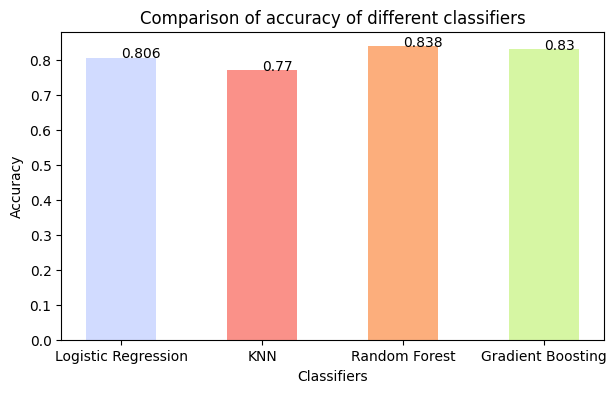

In [ ]:
c = results['Classifier']
a = results['Accuracy']
col = ['#D1DBFF', '#FA9189', '#FCAE7C', '#D6F6A3']
plt.figure(figsize=(7,4))
plt.bar(c,a,width = 0.5, color=col[:len(c)])
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Comparison of accuracy of different classifiers")
for x,y in zip(c, a):
    plt.text(x, y, str(y))
plt.show()